In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Network(object):
    
    def __init__(self, sizes):
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1], sizes[1:])]
    
    def feedforward(self, a):
        
        for b,w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print "Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test)
            else:
                print "Epoch {0} complete".format(j)
                
    def update_mini_batch(self, mini_batch, eta):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
    
    def backprop(self, x, y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x]
        zs = []
        
        for b,w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        delta = (activations[-1]-y)*sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta)*sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
            
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        
        test_results = [(np.argmax(self.feedforward(x)), y) for x,y in test_data]
        return sum(int(x==y) for x,y in test_results)
    
def sigmoid(z):
    
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    
    return sigmoid(z)*(1-sigmoid(z))

In [3]:
import cPickle
import gzip

f = gzip.open('data/mnist.pkl.gz','rb')
training_data, validation_data, test_data = cPickle.load(f)
f.close()

In [4]:
def vectorized_result(j):
    e = np.zeros((10,1))
    e[j] = 1.0
    return e
    
training_inputs = [np.reshape(x, (784,1)) for x in training_data[0]]
training_results = [vectorized_result(y) for y in training_data[1]]
training_data = zip(training_inputs, training_results)

validation_inputs = [np.reshape(x, (784, 1)) for x in validation_data[0]]
validation_data = zip(validation_inputs, validation_data[1])

test_inputs = [np.reshape(x, (784,1)) for x in test_data[0]]
test_data = zip(test_inputs, test_data[1])

In [52]:
net = Network([784,30,10])
net.SGD(training_data,30,10,3.0,test_data)

Epoch 0: 9075 / 10000
Epoch 1: 9255 / 10000
Epoch 2: 9296 / 10000
Epoch 3: 9334 / 10000
Epoch 4: 9366 / 10000
Epoch 5: 9363 / 10000
Epoch 6: 9421 / 10000
Epoch 7: 9438 / 10000
Epoch 8: 9443 / 10000
Epoch 9: 9394 / 10000
Epoch 10: 9462 / 10000
Epoch 11: 9469 / 10000
Epoch 12: 9426 / 10000
Epoch 13: 9434 / 10000
Epoch 14: 9454 / 10000
Epoch 15: 9484 / 10000
Epoch 16: 9486 / 10000
Epoch 17: 9477 / 10000
Epoch 18: 9501 / 10000
Epoch 19: 9404 / 10000
Epoch 20: 9480 / 10000
Epoch 21: 9484 / 10000
Epoch 22: 9442 / 10000
Epoch 23: 9473 / 10000
Epoch 24: 9480 / 10000
Epoch 25: 9493 / 10000
Epoch 26: 9463 / 10000
Epoch 27: 9474 / 10000
Epoch 28: 9488 / 10000
Epoch 29: 9484 / 10000


In [53]:
net = Network([784,100,10])
net.SGD(training_data,30,10,3.0,test_data)

Epoch 0: 5606 / 10000
Epoch 1: 6588 / 10000
Epoch 2: 6687 / 10000
Epoch 3: 6714 / 10000
Epoch 4: 6747 / 10000
Epoch 5: 7644 / 10000
Epoch 6: 7672 / 10000
Epoch 7: 8622 / 10000
Epoch 8: 8640 / 10000
Epoch 9: 8626 / 10000
Epoch 10: 8688 / 10000
Epoch 11: 8686 / 10000
Epoch 12: 8691 / 10000
Epoch 13: 8687 / 10000
Epoch 14: 8709 / 10000
Epoch 15: 8707 / 10000
Epoch 16: 8715 / 10000
Epoch 17: 8711 / 10000
Epoch 18: 8723 / 10000
Epoch 19: 8733 / 10000
Epoch 20: 8728 / 10000
Epoch 21: 8715 / 10000
Epoch 22: 8732 / 10000
Epoch 23: 8714 / 10000
Epoch 24: 8743 / 10000
Epoch 25: 8740 / 10000
Epoch 26: 8723 / 10000
Epoch 27: 8734 / 10000
Epoch 28: 8743 / 10000
Epoch 29: 8733 / 10000


In [5]:
class QuadraticCost(object):

    @staticmethod
    def fn(a, y):
        return 0.5*np.linalg.norm(a-y)**2

    @staticmethod
    def delta(z, a, y):
        return (a-y) * sigmoid_prime(z)

class CrossEntropyCost(object):
    
    @staticmethod
    def fn(a, y):
        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

    @staticmethod
    def delta(z, a, y):
        return (a-y)

class Network2(object):
    
    def __init__(self, sizes, cost=CrossEntropyCost):
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.default_weight_initializer()
        self.cost=cost
        
    def default_weight_initializer(self):
        
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)/np.sqrt(x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
    
    def large_weight_initializer(self):
        
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]
        
    def feedforward(self, a):
        
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta,
            lmbda = 0.0,
            evaluation_data=None,
            monitor_evaluation_cost=False,
            monitor_evaluation_accuracy=False,
            monitor_training_cost=False,
            monitor_training_accuracy=False):
        
        if evaluation_data: n_data = len(evaluation_data)
        n = len(training_data)
        evaluation_cost, evaluation_accuracy = [], []
        training_cost, training_accuracy = [], []
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta, lmbda, len(training_data))
            print "Epoch %s training complete" % j
            if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print "Cost on training data: {}".format(cost)
            if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert=True)
                training_accuracy.append(accuracy)
                print "Accuracy on training data: {} / {}".format(accuracy, n)
            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert=True)
                evaluation_cost.append(cost)
                print "Cost on evaluation data: {}".format(cost)
            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print "Accuracy on evaluation data: {} / {}".format(self.accuracy(evaluation_data), n_data)
            
            
        return evaluation_cost, evaluation_accuracy,training_cost, training_accuracy
    
    def update_mini_batch(self, mini_batch, eta, lmbda, n):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = (self.cost).delta(zs[-1], activations[-1], y)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
            
        return (nabla_b, nabla_w)
    
    def accuracy(self, data, convert=False):
        
        if convert:
            results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                       for (x, y) in data]
        else:
            results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in data]
        return sum(int(x == y) for (x, y) in results)
    
    def total_cost(self, data, lmbda, convert=False):
        
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert: y = vectorized_result(y)
            cost += self.cost.fn(a, y)/len(data)
        cost += 0.5*(lmbda/len(data))*sum(
            np.linalg.norm(w)**2 for w in self.weights)
        return cost
    
    

In [42]:
def make_plots(test_cost, test_accuracy, training_cost, training_accuracy, num_epochs, 
               training_cost_xmin=0, 
               test_accuracy_xmin=0, 
               test_cost_xmin=0, 
               training_accuracy_xmin=0,
               training_set_size=1000):
    plot_training_cost(training_cost, num_epochs, training_cost_xmin)
    plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin)
    plot_test_cost(test_cost, num_epochs, test_cost_xmin)
    plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin, training_set_size)
    plot_overlay(test_accuracy, training_accuracy, num_epochs,
                 min(test_accuracy_xmin, training_accuracy_xmin),
                 training_set_size)

def plot_training_cost(training_cost, num_epochs, training_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_cost_xmin, num_epochs), 
            training_cost[training_cost_xmin:num_epochs],
            color='#2A6EA6')
    #ax.set_xlim([training_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the training data')
    plt.show()

def plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy/100.0 
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    #ax.set_xlim([test_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the test data')
    plt.show()

def plot_test_cost(test_cost, num_epochs, test_cost_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_cost_xmin, num_epochs), 
            test_cost[test_cost_xmin:num_epochs],
            color='#2A6EA6')
    #ax.set_xlim([test_cost_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Cost on the test data')
    plt.show()

def plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin, training_set_size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    #ax.set_xlim([training_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the training data')
    plt.show()

def plot_overlay(test_accuracy, training_accuracy, num_epochs, xmin,
                 training_set_size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy/100 for accuracy in test_accuracy], 
            color='#2A6EA6',
            label="Accuracy on the test data")
    ax.plot(np.arange(xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy], 
            color='#FFA933',
            label="Accuracy on the training data")
    ax.grid(True)
    #ax.set_xlim([xmin, num_epochs])
    ax.set_xlabel('Epoch')
    #ax.set_ylim([80, 100])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#Plotting graphs without regularization and checking for overfitting

In [12]:
net = Network2([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy  = net.SGD(training_data[:1000], 400, 10, 0.5,lmbda = 0,
                  evaluation_data=test_data,
                  monitor_evaluation_cost=True, 
                  monitor_evaluation_accuracy=True, 
                  monitor_training_cost=True, 
                  monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 1.82662285971
Accuracy on training data: 687 / 1000
Cost on evaluation data: 2.16257704493
Accuracy on evaluation data: 5777 / 10000
Epoch 1 training complete
Cost on training data: 1.33017865691
Accuracy on training data: 780 / 1000
Cost on evaluation data: 1.75980056355
Accuracy on evaluation data: 6677 / 10000
Epoch 2 training complete
Cost on training data: 1.06775219398
Accuracy on training data: 844 / 1000
Cost on evaluation data: 1.54237644953
Accuracy on evaluation data: 7313 / 10000
Epoch 3 training complete
Cost on training data: 0.914616690354
Accuracy on training data: 864 / 1000
Cost on evaluation data: 1.44196443158
Accuracy on evaluation data: 7470 / 10000
Epoch 4 training complete
Cost on training data: 0.759200539184
Accuracy on training data: 910 / 1000
Cost on evaluation data: 1.34927844957
Accuracy on evaluation data: 7720 / 10000
Epoch 5 training complete
Cost on training data: 0.651554310457
Accuracy on training dat

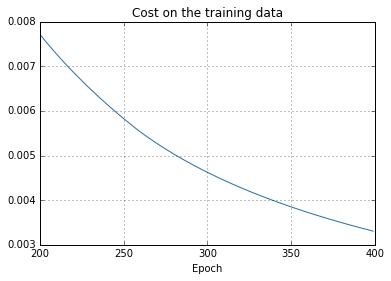

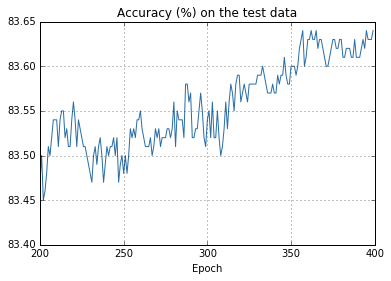

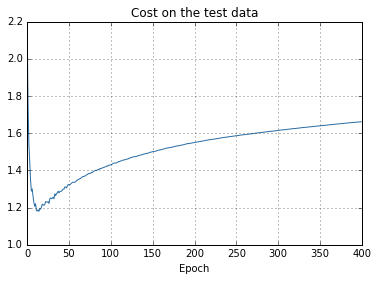

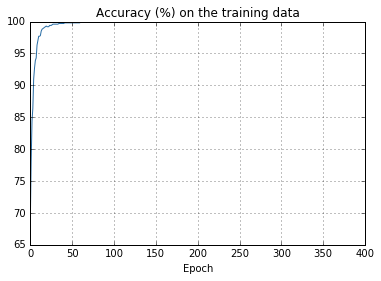

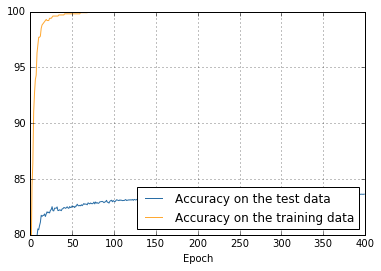

In [18]:
make_plots(test_cost, test_accuracy, training_cost, training_accuracy, num_epochs = 400)

In [ ]:
#Plotting graphs with regularization 

Epoch 0 training complete
Cost on training data: 0.60623793459
Accuracy on training data: 45506 / 50000
Cost on evaluation data: 0.702710629346
Accuracy on evaluation data: 9104 / 10000
Epoch 1 training complete
Cost on training data: 0.484103095021
Accuracy on training data: 46560 / 50000
Cost on evaluation data: 0.592955678338
Accuracy on evaluation data: 9304 / 10000
Epoch 2 training complete
Cost on training data: 0.412539171932
Accuracy on training data: 47139 / 50000
Cost on evaluation data: 0.550360337874
Accuracy on evaluation data: 9357 / 10000
Epoch 3 training complete
Cost on training data: 0.400946139917
Accuracy on training data: 47256 / 50000
Cost on evaluation data: 0.530780245832
Accuracy on evaluation data: 9402 / 10000
Epoch 4 training complete
Cost on training data: 0.350849366603
Accuracy on training data: 47637 / 50000
Cost on evaluation data: 0.513507286401
Accuracy on evaluation data: 9437 / 10000
Epoch 5 training complete
Cost on training data: 0.340020511741
Ac

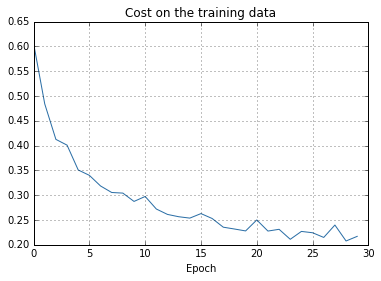

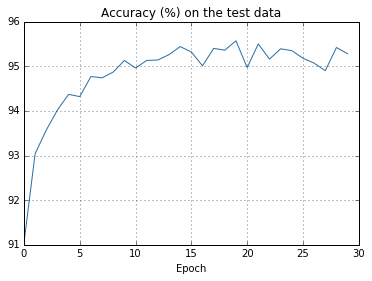

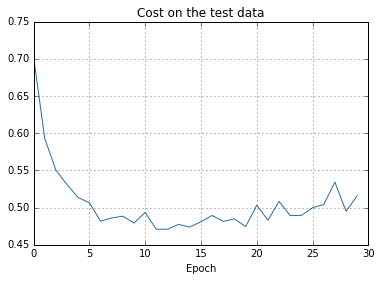

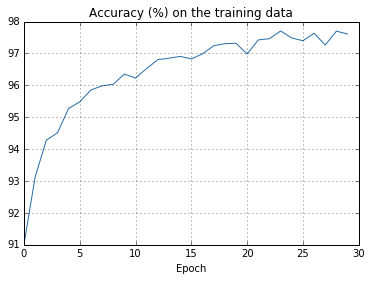

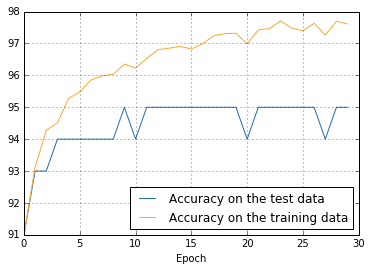

In [45]:
#Regularization: Lambda = 0.1

net = Network2([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy  = net.SGD(training_data, 30, 10, 0.5,lmbda = 0.1,
                  evaluation_data=test_data,
                  monitor_evaluation_cost=True, 
                  monitor_evaluation_accuracy=True, 
                  monitor_training_cost=True, 
                  monitor_training_accuracy=True)
make_plots(test_cost, test_accuracy, training_cost, training_accuracy, num_epochs = 30, training_set_size=50000)

Epoch 0 training complete
Cost on training data: 1.30521339479
Accuracy on training data: 45656 / 50000
Cost on evaluation data: 4.33452494013
Accuracy on evaluation data: 9088 / 10000
Epoch 1 training complete
Cost on training data: 0.939848478053
Accuracy on training data: 46579 / 50000
Cost on evaluation data: 2.95255271967
Accuracy on evaluation data: 9220 / 10000
Epoch 2 training complete
Cost on training data: 0.720783239832
Accuracy on training data: 47207 / 50000
Cost on evaluation data: 2.11823473602
Accuracy on evaluation data: 9371 / 10000
Epoch 3 training complete
Cost on training data: 0.58695857647
Accuracy on training data: 47572 / 50000
Cost on evaluation data: 1.63968254639
Accuracy on evaluation data: 9437 / 10000
Epoch 4 training complete
Cost on training data: 0.509036421
Accuracy on training data: 47763 / 50000
Cost on evaluation data: 1.36084631328
Accuracy on evaluation data: 9469 / 10000
Epoch 5 training complete
Cost on training data: 0.460132729582
Accuracy on

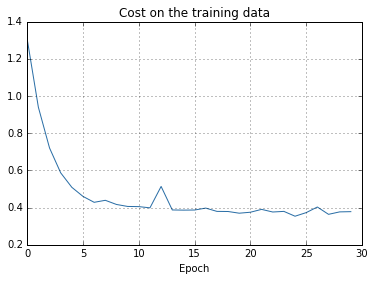

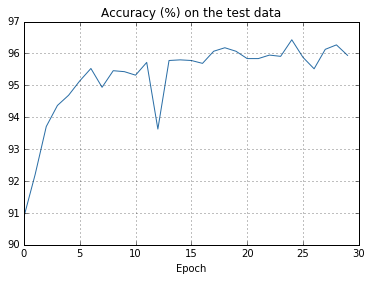

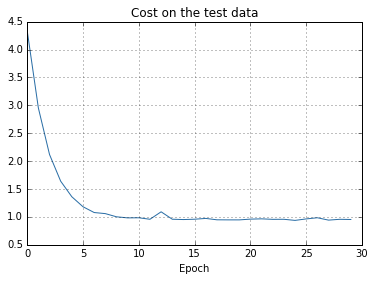

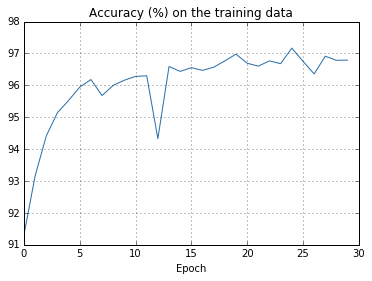

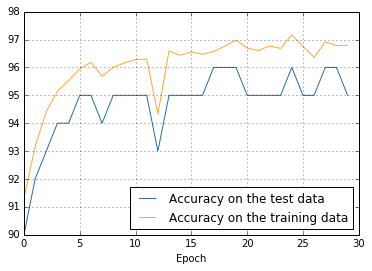

In [46]:
#Regularization: Lambda = 5.0

net = Network2([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy  = net.SGD(training_data, 30, 10, 0.5,lmbda = 5.0,
                  evaluation_data=test_data,
                  monitor_evaluation_cost=True, 
                  monitor_evaluation_accuracy=True, 
                  monitor_training_cost=True, 
                  monitor_training_accuracy=True)
make_plots(test_cost, test_accuracy, training_cost, training_accuracy, num_epochs = 30, training_set_size = 50000)

In [ ]:
#Weight Initialization

Epoch 0 training complete
Accuracy on evaluation data: 9250 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9374 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9454 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9503 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9547 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9548 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9556 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9576 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9544 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9574 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9605 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9623 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9601 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9614 / 10000
Epoch 14 training complete
Accuracy on evalu

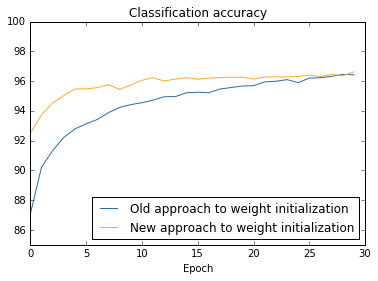

In [47]:
net = Network2([784, 30, 10], cost=CrossEntropyCost)
default_vc, default_va, default_tc, default_ta = net.SGD(training_data, 30, 10, 0.1, lmbda=5.0,
                  evaluation_data=validation_data, 
                  monitor_evaluation_accuracy=True)

net.large_weight_initializer()
large_vc, large_va, large_tc, large_ta = net.SGD(training_data, 30, 10, 0.1, lmbda=5.0,
                  evaluation_data=validation_data, 
                  monitor_evaluation_accuracy=True)


default_va = [x/100.0 for x in default_va]
large_va = [x/100.0 for x in large_va]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(0, 30, 1), large_va, color='#2A6EA6',label="Old approach to weight initialization")
ax.plot(np.arange(0, 30, 1), default_va, color='#FFA933',label="New approach to weight initialization")
ax.set_xlim([0, 30])
ax.set_xlabel('Epoch')
ax.set_ylim([85, 100])
ax.set_title('Classification accuracy')
plt.legend(loc="lower right")
plt.show()

In [48]:
#Multiple Learning Rate

In [50]:
results = []
for eta in [0.025, 0.25, 2.5]:
    net = Network2([784, 30, 10])
    results.append(net.SGD(training_data, 30, 10, eta, lmbda=5.0,evaluation_data=validation_data, 
                           monitor_training_cost=True))

Epoch 0 training complete
Cost on training data: 0.875100981841
Epoch 1 training complete
Cost on training data: 0.665834161141
Epoch 2 training complete
Cost on training data: 0.587337177012
Epoch 3 training complete
Cost on training data: 0.540702517379
Epoch 4 training complete
Cost on training data: 0.508323632487
Epoch 5 training complete
Cost on training data: 0.484725543777
Epoch 6 training complete
Cost on training data: 0.467062771314
Epoch 7 training complete
Cost on training data: 0.450548975718
Epoch 8 training complete
Cost on training data: 0.438586571877
Epoch 9 training complete
Cost on training data: 0.425433721319
Epoch 10 training complete
Cost on training data: 0.415319404811
Epoch 11 training complete
Cost on training data: 0.409943668312
Epoch 12 training complete
Cost on training data: 0.400651009344
Epoch 13 training complete
Cost on training data: 0.396550818716
Epoch 14 training complete
Cost on training data: 0.388764021709
Epoch 15 training complete
Cost on 

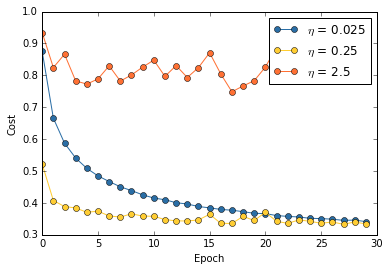

In [52]:
LEARNING_RATES = [0.025, 0.25, 2.5]
COLORS = ['#2A6EA6', '#FFCD33', '#FF7033']
NUM_EPOCHS = 30

fig = plt.figure()
ax = fig.add_subplot(111)
for eta, result, color in zip(LEARNING_RATES, results, COLORS):
    _, _, training_cost, _ = result
    ax.plot(np.arange(NUM_EPOCHS), training_cost, "o-",
                label="$\eta$ = "+str(eta),
                color=color)
    ax.set_xlim([0, NUM_EPOCHS])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Cost')
    plt.legend(loc='upper right')
plt.show()
